In [2]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
#dataset=pd.read_csv('C:/Users/Asrar/Downloads/kc_house_data.csv')
#dataset.head(2)

In [4]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# US_Accidents_Dec21_updated.csv

In [5]:
df=pd.read_csv('US_Accidents_May19.csv')                       #('US_Accidents_Dec21_updated.csv')
df.head(2)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day


In [6]:
df.value_counts

<bound method DataFrame.value_counts of                 ID    Source    TMC  Severity           Start_Time  \
0              A-1  MapQuest  201.0         3  2016-02-08 05:46:00   
1              A-2  MapQuest  201.0         2  2016-02-08 06:07:59   
2              A-3  MapQuest  201.0         2  2016-02-08 06:49:27   
3              A-4  MapQuest  201.0         3  2016-02-08 07:23:34   
4              A-5  MapQuest  201.0         2  2016-02-08 07:39:07   
...            ...       ...    ...       ...                  ...   
2243934  A-2243935      Bing    NaN         2  2017-08-30 20:01:40   
2243935  A-2243936      Bing    NaN         2  2017-08-30 20:01:40   
2243936  A-2243937      Bing    NaN         3  2017-08-30 20:03:10   
2243937  A-2243938      Bing    NaN         4  2017-08-30 20:49:40   
2243938  A-2243939      Bing    NaN         4  2017-08-30 20:48:10   

                    End_Time  Start_Lat   Start_Lng    End_Lat     End_Lng  \
0        2016-02-08 11:00:00  39.865147  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [8]:
print(df.columns)

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [9]:
#df.label.value_counts()

In [10]:
## Severity

##  Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 
##  4 indicates a significant impact on traffic (i.e., long delay)

In [12]:
## Imbalance datast

df.Severity.value_counts()

2    1455524
3     715582
4      72002
1        814
0         17
Name: Severity, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [14]:
df['Start_Time']

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
2243934    2017-08-30 20:01:40
2243935    2017-08-30 20:01:40
2243936    2017-08-30 20:03:10
2243937    2017-08-30 20:49:40
2243938    2017-08-30 20:48:10
Name: Start_Time, Length: 2243939, dtype: object

In [15]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
#df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df['End_Time'] =pd.to_datetime(df['End_Time'],errors='coerce')

In [16]:
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

In [17]:
df['Year'][0:2]

0    2016
1    2016
Name: Year, dtype: int64

In [18]:
# Extract the amount of time in the unit of minutes for each accident,
# round to the nearest integer

In [19]:
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               int64         
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode               

In [20]:
print(df.columns)

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Hour', 'Weekday',
       'Time_Duration(min)'],
      dtype='object')


In [21]:
df.State.value_counts()

CA    484706
TX    237637
FL    177490
NC    108916
NY    105523
SC     99890
PA     75814
MI     74045
IL     71701
GA     66637
VA     61426
WA     50480
OH     46100
AZ     43411
OR     42565
TN     42464
NJ     40346
MN     40000
LA     38143
OK     36183
MD     34315
CO     26916
MA     26096
IN     24162
UT     23212
MO     22481
AL     22063
NE     19328
CT     18708
KY     13765
WI     12884
IA      8336
RI      8298
NV      7389
NH      5593
KS      5486
MS      4586
NM      3889
DE      3124
DC      2558
WV      1951
ME      1580
ID      1352
AR      1019
WY       438
MT       434
VT       418
SD        44
ND        37
Name: State, dtype: int64

In [22]:
# Outlayers
#[df[td]<=12]

In [23]:
#df[td]<=0
df[td][df[td]<=12]

13277      10.0
69720      -0.0
69721      -0.0
69722      -0.0
69723      -1.0
69724      -1.0
309389    -30.0
309390    -30.0
746173    -30.0
746174    -31.0
752178     12.0
804471      6.0
876559     10.0
879963      1.0
921149     10.0
961530     11.0
1182523    12.0
1208639    11.0
1482940   -30.0
1483025   -30.0
1483026   -31.0
1508818     2.0
1604961    11.0
1977345    12.0
1980120    10.0
1988002    12.0
1988003    12.0
1991725    11.0
2014527    11.0
2019015    12.0
2025541    11.0
2026348    11.0
2028158    12.0
2029652    11.0
2038017   -31.0
2038381    12.0
2058025    10.0
2059554    12.0
2065048    10.0
2073233    10.0
2075411    10.0
2082366    12.0
2089443    10.0
2090743    11.0
2090745    11.0
2103622    11.0
2113574     7.0
2145434     7.0
2147399    11.0
2170517    11.0
2192747     8.0
2228789    11.0
2231924     9.0
Name: Time_Duration(min), dtype: float64

In [24]:
#df[td][df[td]<=0]

In [25]:
#df[td][df[td]<=2]

In [26]:
# any negative time_durdfion values

df[td][df[td]<=0]

69720      -0.0
69721      -0.0
69722      -0.0
69723      -1.0
69724      -1.0
309389    -30.0
309390    -30.0
746173    -30.0
746174    -31.0
1482940   -30.0
1483025   -30.0
1483026   -31.0
2038017   -31.0
Name: Time_Duration(min), dtype: float64

In [27]:
df[td][:4]

0    314.0
1     30.0
2     30.0
3     30.0
Name: Time_Duration(min), dtype: float64

In [28]:
df[td][df[td]<=0]

69720      -0.0
69721      -0.0
69722      -0.0
69723      -1.0
69724      -1.0
309389    -30.0
309390    -30.0
746173    -30.0
746174    -31.0
1482940   -30.0
1483025   -30.0
1483026   -31.0
2038017   -31.0
Name: Time_Duration(min), dtype: float64

In [29]:
df[td]

0          314.0
1           30.0
2           30.0
3           30.0
4           30.0
           ...  
2243934    360.0
2243935    360.0
2243936    360.0
2243937    360.0
2243938    360.0
Name: Time_Duration(min), Length: 2243939, dtype: float64

In [30]:
neg_outliers=df[td]<=0

In [31]:
# Set outliers to NAN
df[neg_outliers]=np.nan

# Drop rows with negative td
df.dropna(subset=[td],axis=0)




,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Time_Duration(min)
0,A-1,MapQuest,201.0,3.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,Night,Night,Night,Night,2016.0,Feb,8.0,5.0,Mon,314.0
1,A-2,MapQuest,201.0,2.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,Night,Night,Night,Day,2016.0,Feb,8.0,6.0,Mon,30.0
2,A-3,MapQuest,201.0,2.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,Night,Night,Day,Day,2016.0,Feb,8.0,6.0,Mon,30.0
3,A-4,MapQuest,201.0,3.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,Night,Day,Day,Day,2016.0,Feb,8.0,7.0,Mon,30.0
4,A-5,MapQuest,201.0,2.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,Day,Day,Day,Day,2016.0,Feb,8.0,7.0,Mon,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243934,A-2243935,Bing,NaN,2.0,2017-08-30 20:01:40,2017-08-31 02:01:40,34.055160,-118.214070,34.058220,-118.214270,...,Night,Night,Day,Day,2017.0,Aug,30.0,20.0,Wed,360.0
2243935,A-2243936,Bing,NaN,2.0,2017-08-30 20:01:40,2017-08-31 02:01:40,34.046740,-118.214800,34.055160,-118.214070,...,Night,Night,Day,Day,2017.0,Aug,30.0,20.0,Wed,360.0
2243936,A-2243937,Bing,NaN,3.0,2017-08-30 20:03:10,2017-08-31 02:03:10,34.031850,-117.135910,34.025370,-117.116160,...,Night,Night,Day,Day,2017.0,Aug,30.0,20.0,Wed,360.0
2243937,A-2243938,Bing,NaN,4.0,2017-08-30 20:49:40,2017-08-31 02:49:40,34.277860,-118.608280,34.266581,-118.640372,...,Night,Night,Night,Night,2017.0,Aug,30.0,20.0,Wed,360.0


In [32]:
 # further check to make sure no more negative td

df[td][df[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               float64       
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode               

In [34]:
df[td][df[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In [35]:
df.isnull().sum()

ID                            13
Source                        13
TMC                       516774
Severity                      13
Start_Time                    13
End_Time                      13
Start_Lat                     13
Start_Lng                     13
End_Lat                  1727178
End_Lng                  1727178
Distance(mi)                  13
Description                   14
Number                   1458408
Street                        13
Side                          13
City                          81
County                        13
State                         13
Zipcode                      659
Country                       13
Timezone                    2154
Airport_Code               23677
Weather_Timestamp          47183
Temperature(F)             62278
Wind_Chill(F)            1852371
Humidity(%)                64480
Pressure(in)               57293
Visibility(mi)             71373
Wind_Direction             47203
Wind_Speed(mph)           442960
Precipitat

In [36]:
#df[df['State']==state]['Weather_Condition'].value_counts(normalize=True).round(5)

In [37]:
df[df['State']=='TX']['Weather_Condition'].value_counts(normalize=True).round(5)

Clear                                  0.33306
Overcast                               0.19585
Mostly Cloudy                          0.16045
Partly Cloudy                          0.12019
Scattered Clouds                       0.11003
Light Rain                             0.03498
Rain                                   0.00851
Haze                                   0.00834
Fog                                    0.00729
Light Drizzle                          0.00460
Light Thunderstorms and Rain           0.00361
Heavy Rain                             0.00321
Thunderstorm                           0.00254
Thunderstorms and Rain                 0.00171
Heavy Thunderstorms and Rain           0.00162
Mist                                   0.00091
Drizzle                                0.00070
Shallow Fog                            0.00046
Patches of Fog                         0.00045
Light Snow                             0.00042
Light Freezing Rain                    0.00029
Widespread Du

In [38]:
# Define lists of states, colors, linestyles, month order, day_order, and hour_order
# For this notebook, we will focus on the following three states: NJ, PA, & NY

state_lst=['NJ','PA','NY']
state_lst_full=['New Jersey','Pennsylvania','New York']

In [39]:
df1 = df[df.State.isin(state_lst)]
df1.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Time_Duration(min)
194255,A-194256,MapQuest,201.0,2.0,2016-11-30 16:37:24,2016-11-30 17:22:05,40.775616,-74.237305,NaN,NaN,...,Night,Day,Day,Day,2016.0,Nov,30.0,16.0,Wed,45.0
194256,A-194257,MapQuest,241.0,3.0,2016-11-30 16:25:41,2016-11-30 17:10:30,41.139324,-74.169876,NaN,NaN,...,Day,Day,Day,Day,2016.0,Nov,30.0,16.0,Wed,45.0
194257,A-194258,MapQuest,201.0,3.0,2016-11-30 15:40:06,2016-11-30 17:09:40,41.118748,-74.159744,NaN,NaN,...,Day,Day,Day,Day,2016.0,Nov,30.0,15.0,Wed,90.0
194258,A-194259,MapQuest,201.0,3.0,2016-11-30 15:26:18,2016-11-30 16:56:02,41.014034,-73.717239,NaN,NaN,...,Day,Day,Day,Day,2016.0,Nov,30.0,15.0,Wed,90.0
194259,A-194260,MapQuest,201.0,3.0,2016-11-30 16:14:11,2016-11-30 16:59:00,41.390369,-73.597969,NaN,NaN,...,Day,Day,Day,Day,2016.0,Nov,30.0,16.0,Wed,45.0


In [40]:
for state in state_lst:
    dfweekday=df[(df['State']==state)]

In [41]:
dfweekday.head(2)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Time_Duration(min)
194256,A-194257,MapQuest,241.0,3.0,2016-11-30 16:25:41,2016-11-30 17:10:30,41.139324,-74.169876,NaN,NaN,...,Day,Day,Day,Day,2016.0,Nov,30.0,16.0,Wed,45.0
194257,A-194258,MapQuest,201.0,3.0,2016-11-30 15:40:06,2016-11-30 17:09:40,41.118748,-74.159744,NaN,NaN,...,Day,Day,Day,Day,2016.0,Nov,30.0,15.0,Wed,90.0


In [42]:
df1[df1['State']==state]['Weather_Condition'].value_counts(normalize=True).round(5)

Clear                           0.22225
Mostly Cloudy                   0.19728
Overcast                        0.19283
Partly Cloudy                   0.12082
Scattered Clouds                0.10245
Light Rain                      0.06219
Light Snow                      0.05045
Rain                            0.01150
Light Drizzle                   0.00662
Snow                            0.00618
Fog                             0.00538
Heavy Rain                      0.00370
Haze                            0.00296
Light Freezing Rain             0.00264
Heavy Snow                      0.00254
Light Thunderstorms and Rain    0.00205
Mist                            0.00135
Patches of Fog                  0.00112
Thunderstorm                    0.00073
Light Ice Pellets               0.00070
Blowing Snow                    0.00068
Shallow Fog                     0.00059
Light Freezing Fog              0.00058
Drizzle                         0.00051
Heavy Thunderstorms and Rain    0.00048


In [43]:
df1[df1['State']=='NJ']['City'].value_counts(normalize=True)

Newark           0.056982
Fort Lee         0.031379
Trenton          0.029049
Jersey City      0.026620
Bellmawr         0.019308
                   ...   
Martinsville     0.000025
Port Norris      0.000025
River Vale       0.000025
Bay Head         0.000025
Bradley Beach    0.000025
Name: City, Length: 521, dtype: float64

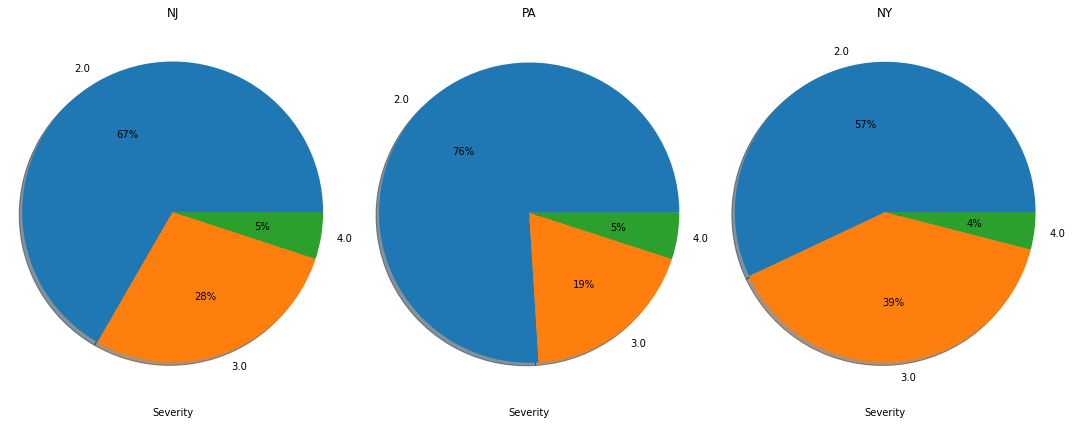

In [44]:
# The severity of accidents for each state
feature='Severity'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=0

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df1[df1['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

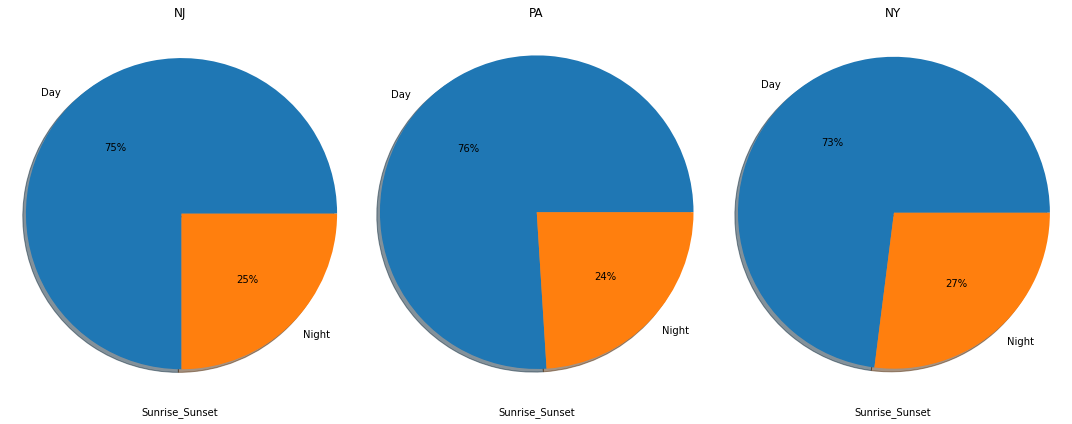

In [46]:
# The day or night when accidents occurred for each state
feature='Sunrise_Sunset'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)
    
plt.tight_layout()
plt.show()

In [47]:
df.Severity.value_counts().sort_values(ascending=False)

2.0    1455516
3.0     715577
4.0      72002
1.0        814
0.0         17
Name: Severity, dtype: int64

In [48]:
#### Most accident occuer on DAY

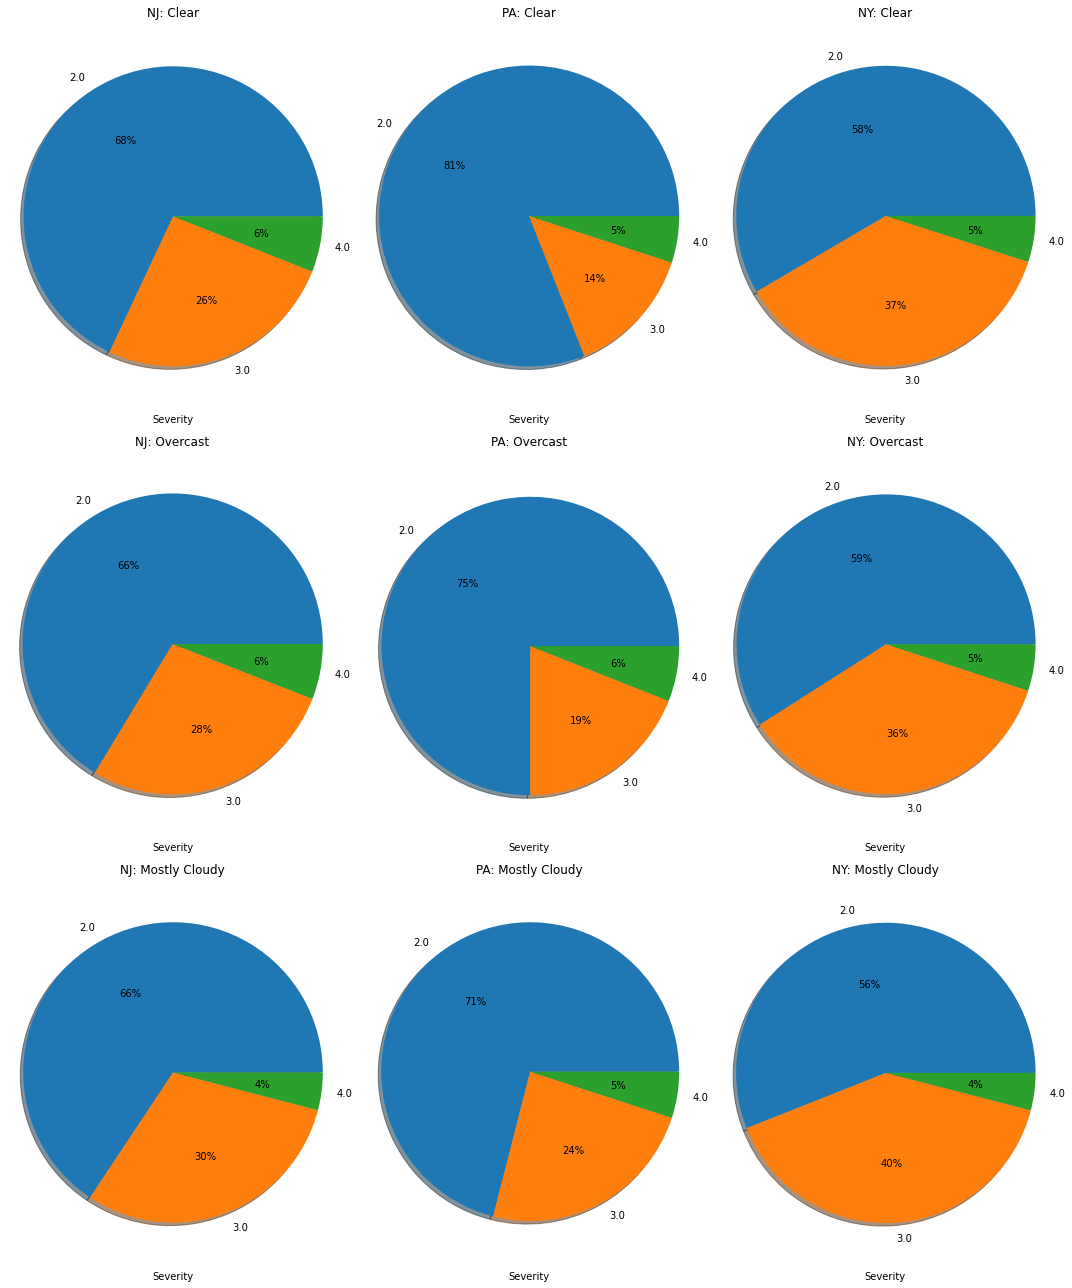

In [49]:
# The weather condition for each state; for each of the following weather conditions (Clear, Overcast and Mostly Cloudy), what's the severity?
feature='Severity'
weather_lst=['Clear','Overcast','Mostly Cloudy']
fig_x=len(state_lst)
fig_y=len(weather_lst)

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6*fig_y))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each weather condition
for i,weather in enumerate(weather_lst):
    # Run a for loop for each state
    for j,state in enumerate(state_lst):
    
        # Set a sub plot
        plt.subplot(fig_y, fig_x, i*fig_x+j+1)
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Weather_Condition']==weather)][feature].value_counts(normalize=True).round(2)

        # Define lables to go with the pie plot
        labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
        # Generate the pie plot
        plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
        # Set axis,label and title
        plt.axis('equal')
        plt.xlabel(feature)
        plt.title(state+': '+weather)

plt.tight_layout()
plt.show()


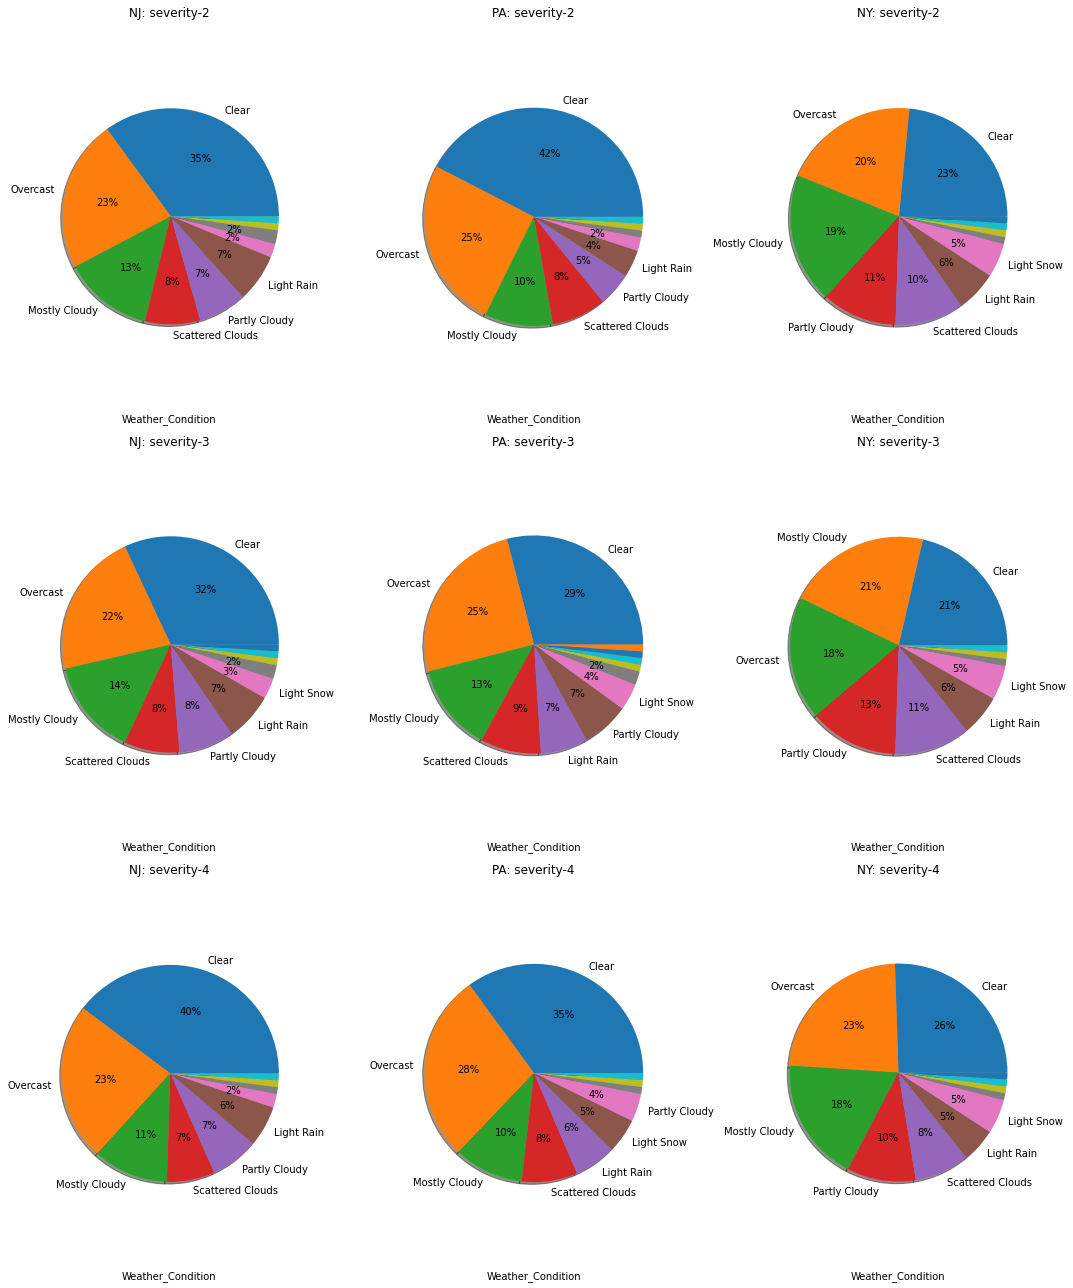

In [50]:
feature='Weather_Condition'
severity_lst=[2,3,4]
fig_x=len(state_lst)
fig_y=len(severity_lst)

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6*fig_y))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each weather condition
for i,severity in enumerate(severity_lst):
    # Run a for loop for each state
    for j,state in enumerate(state_lst):
    
        # Set a sub plot
        plt.subplot(fig_y, fig_x, i*fig_x+j+1)
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Severity']==severity)][feature].value_counts(normalize=True).round(2)

        # Define lables to go with the pie plot
        labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
        # Generate the pie plot
        plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
        # Set axis,label and title
        plt.axis('equal')
        plt.xlabel(feature)
        plt.title(state+': severity-'+str(severity))

plt.tight_layout()
plt.show()


In [123]:
## Deal with outliers

# Remove outliers for Time_Duration(min): n * standard_deviation (n=3), backfill with median

In [51]:
# Remove outliers for Time_Duration(min): n * standard_deviation (n=3), backfill with median

n=3
medin=df[td].median()
std=df[td].std()
outliers=(df[td]-medin).abs()>std*n

# Set outliers to NAN

df[outliers]=np.nan

# Fill NAN with median

df[td].fillna(medin,inplace=True)


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               float64       
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode               

In [53]:
df.isnull().sum()

ID                           501
Source                       501
TMC                       516793
Severity                     501
Start_Time                   501
End_Time                     501
Start_Lat                    501
Start_Lng                    501
End_Lat                  1727647
End_Lng                  1727647
Distance(mi)                 501
Description                  502
Number                   1458569
Street                       501
Side                         501
City                         569
County                       501
State                        501
Zipcode                     1147
Country                      501
Timezone                    2642
Airport_Code               24147
Weather_Timestamp          47632
Temperature(F)             62716
Wind_Chill(F)            1852448
Humidity(%)                64918
Pressure(in)               57736
Visibility(mi)             71813
Wind_Direction             47652
Wind_Speed(mph)           443337
Precipitat

<AxesSubplot:>

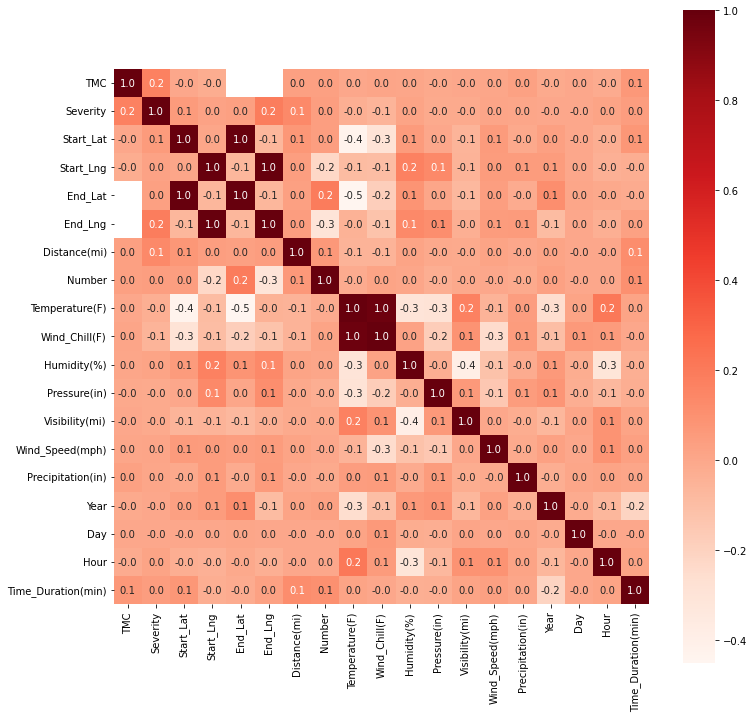

In [54]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds') 

In [55]:
print(df.columns)

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Hour', 'Weekday',
       'Time_Duration(min)'],
      dtype='object')


C:\Users\Asrar\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


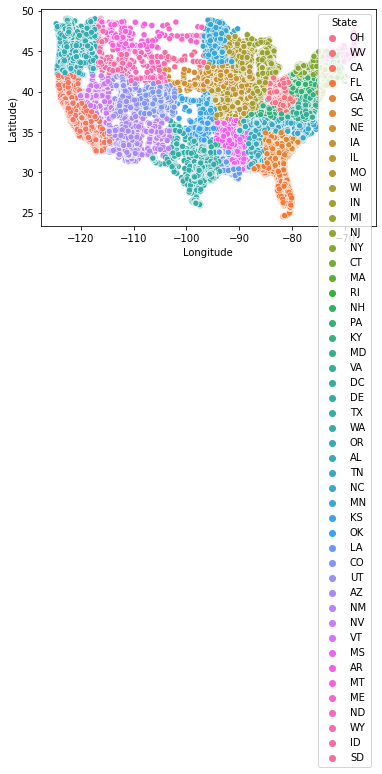

In [129]:
#### IT TAKES LONG TIME 

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='State')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

In [56]:
# Print time_duration information

print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident td: {} minutes.'.format(df[td].max(),round(df[td].max()/60), round(df[td].max()/60/24), df[td].min()))

Max time to clear an accident: 12424.0 minutes or 207 hours or 9 days; Min to clear an accident td: 1.0 minutes.


In [57]:
df.head(2)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Time_Duration(min)
0,A-1,MapQuest,201.0,3.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,Night,Night,Night,Night,2016.0,Feb,8.0,5.0,Mon,314.0
1,A-2,MapQuest,201.0,2.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,Night,Night,Night,Day,2016.0,Feb,8.0,6.0,Mon,30.0


In [59]:
df['TMC'][0:2] 

0    201.0
1    201.0
Name: TMC, dtype: float64

In [60]:
feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [61]:
df_sel=df[feature_lst].copy()
df_sel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 34 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Source              object 
 1   TMC                 float64
 2   Severity            float64
 3   Start_Lng           float64
 4   Start_Lat           float64
 5   Distance(mi)        float64
 6   Side                object 
 7   City                object 
 8   County              object 
 9   State               object 
 10  Timezone            object 
 11  Temperature(F)      float64
 12  Humidity(%)         float64
 13  Pressure(in)        float64
 14  Visibility(mi)      float64
 15  Wind_Direction      object 
 16  Weather_Condition   object 
 17  Amenity             object 
 18  Bump                object 
 19  Crossing            object 
 20  Give_Way            object 
 21  Junction            object 
 22  No_Exit             object 
 23  Railway             object 
 24  Roundabout          obje

In [62]:
#  missing values

df_sel.isnull().sum()

Source                   501
TMC                   516793
Severity                 501
Start_Lng                501
Start_Lat                501
Distance(mi)             501
Side                     501
City                     569
County                   501
State                    501
Timezone                2642
Temperature(F)         62716
Humidity(%)            64918
Pressure(in)           57736
Visibility(mi)         71813
Wind_Direction         47652
Weather_Condition      72458
Amenity                  501
Bump                     501
Crossing                 501
Give_Way                 501
Junction                 501
No_Exit                  501
Railway                  501
Roundabout               501
Station                  501
Stop                     501
Traffic_Calming          501
Traffic_Signal           501
Turning_Loop             501
Sunrise_Sunset           578
Hour                     501
Weekday                  501
Time_Duration(min)         0
dtype: int64

In [63]:
df_sel.isnull().mean()

Source                0.000223
TMC                   0.230306
Severity              0.000223
Start_Lng             0.000223
Start_Lat             0.000223
Distance(mi)          0.000223
Side                  0.000223
City                  0.000254
County                0.000223
State                 0.000223
Timezone              0.001177
Temperature(F)        0.027949
Humidity(%)           0.028930
Pressure(in)          0.025730
Visibility(mi)        0.032003
Wind_Direction        0.021236
Weather_Condition     0.032291
Amenity               0.000223
Bump                  0.000223
Crossing              0.000223
Give_Way              0.000223
Junction              0.000223
No_Exit               0.000223
Railway               0.000223
Roundabout            0.000223
Station               0.000223
Stop                  0.000223
Traffic_Calming       0.000223
Traffic_Signal        0.000223
Turning_Loop          0.000223
Sunrise_Sunset        0.000258
Hour                  0.000223
Weekday 

In [64]:
df_sel.shape

(2243939, 34)

In [65]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(1663631, 34)

In [66]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663631 entries, 0 to 1727176
Data columns (total 34 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Source              1663631 non-null  object 
 1   TMC                 1663631 non-null  float64
 2   Severity            1663631 non-null  float64
 3   Start_Lng           1663631 non-null  float64
 4   Start_Lat           1663631 non-null  float64
 5   Distance(mi)        1663631 non-null  float64
 6   Side                1663631 non-null  object 
 7   City                1663631 non-null  object 
 8   County              1663631 non-null  object 
 9   State               1663631 non-null  object 
 10  Timezone            1663631 non-null  object 
 11  Temperature(F)      1663631 non-null  float64
 12  Humidity(%)         1663631 non-null  float64
 13  Pressure(in)        1663631 non-null  float64
 14  Visibility(mi)      1663631 non-null  float64
 15  Wind_Direction 

In [67]:
df_sel.columns

Index(['Source', 'TMC', 'Severity', 'Start_Lng', 'Start_Lat', 'Distance(mi)',
       'Side', 'City', 'County', 'State', 'Timezone', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Hour', 'Weekday', 'Time_Duration(min)'],
      dtype='object')

In [68]:
# For Machnelearning
# Only relavent columns

feature_lst=['Source', 'TMC', 'Severity', 'Start_Lng', 'Start_Lat', 'Distance(mi)',
       'Side', 'City', 'County', 'State', 'Timezone', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Hour', 'Weekday', 'Time_Duration(min)']



In [69]:
df_sel=df[feature_lst].copy()

In [70]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 34 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Source              object 
 1   TMC                 float64
 2   Severity            float64
 3   Start_Lng           float64
 4   Start_Lat           float64
 5   Distance(mi)        float64
 6   Side                object 
 7   City                object 
 8   County              object 
 9   State               object 
 10  Timezone            object 
 11  Temperature(F)      float64
 12  Humidity(%)         float64
 13  Pressure(in)        float64
 14  Visibility(mi)      float64
 15  Wind_Direction      object 
 16  Weather_Condition   object 
 17  Amenity             object 
 18  Bump                object 
 19  Crossing            object 
 20  Give_Way            object 
 21  Junction            object 
 22  No_Exit             object 
 23  Railway             object 
 24  Roundabout          obje

In [328]:
# Check missing values

In [329]:
df_sel.isnull().mean()

Source                0.000223
TMC                   0.230306
Severity              0.000223
Start_Lng             0.000223
Start_Lat             0.000223
Distance(mi)          0.000223
Side                  0.000223
City                  0.000254
County                0.000223
State                 0.000223
Timezone              0.001177
Temperature(F)        0.027949
Humidity(%)           0.028930
Pressure(in)          0.025730
Visibility(mi)        0.032003
Wind_Direction        0.021236
Weather_Condition     0.032291
Amenity               0.000223
Bump                  0.000223
Crossing              0.000223
Give_Way              0.000223
Junction              0.000223
No_Exit               0.000223
Railway               0.000223
Roundabout            0.000223
Station               0.000223
Stop                  0.000223
Traffic_Calming       0.000223
Traffic_Signal        0.000223
Turning_Loop          0.000223
Sunrise_Sunset        0.000258
Hour                  0.000223
Weekday 

In [71]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0],how='any',axis=0,inplace=True)

In [195]:
df_sel.shape

(1663631, 34)

In [72]:
df['Start_Lat'][0:2]

0    39.865147
1    39.928059
Name: Start_Lat, dtype: float64

In [73]:
df['Hour'][df['State']=='PA'][0:2]

197866    14.0
208995     9.0
Name: Hour, dtype: float64

In [74]:
# Set state
state='PA'

# Select the state of Pennsylvania

df_state=df_sel.loc[df_sel.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63248 entries, 197866 to 1725073
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source              63248 non-null  object 
 1   TMC                 63248 non-null  float64
 2   Severity            63248 non-null  float64
 3   Start_Lng           63248 non-null  float64
 4   Start_Lat           63248 non-null  float64
 5   Distance(mi)        63248 non-null  float64
 6   Side                63248 non-null  object 
 7   City                63248 non-null  object 
 8   County              63248 non-null  object 
 9   Timezone            63248 non-null  object 
 10  Temperature(F)      63248 non-null  float64
 11  Humidity(%)         63248 non-null  float64
 12  Pressure(in)        63248 non-null  float64
 13  Visibility(mi)      63248 non-null  float64
 14  Wind_Direction      63248 non-null  object 
 15  Weather_Condition   63248 non-null  object 
 1

In [75]:
# df_state.State.value_counts()  # PA    63248

# Map of accidents, color code by county

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

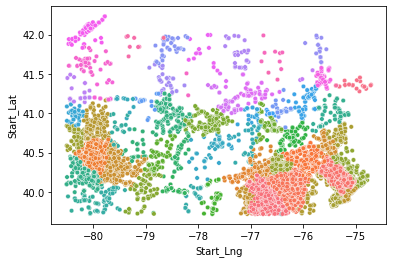

In [76]:
sns.scatterplot(x='Start_Lng',y='Start_Lat',data=df_state,hue='County', legend=False, s=20)

In [77]:
# Set county
county='Montgomery'

# Select the state of Pennsylvania
df_county=df_state.loc[df_state.County==county].copy()
df_county.drop('County',axis=1, inplace=True)
df_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25206 entries, 228554 to 1724934
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source              25206 non-null  object 
 1   TMC                 25206 non-null  float64
 2   Severity            25206 non-null  float64
 3   Start_Lng           25206 non-null  float64
 4   Start_Lat           25206 non-null  float64
 5   Distance(mi)        25206 non-null  float64
 6   Side                25206 non-null  object 
 7   City                25206 non-null  object 
 8   Timezone            25206 non-null  object 
 9   Temperature(F)      25206 non-null  float64
 10  Humidity(%)         25206 non-null  float64
 11  Pressure(in)        25206 non-null  float64
 12  Visibility(mi)      25206 non-null  float64
 13  Wind_Direction      25206 non-null  object 
 14  Weather_Condition   25206 non-null  object 
 15  Amenity             25206 non-null  object 
 1

In [78]:
df_county.head(2)

,Source,TMC,Severity,Start_Lng,Start_Lat,Distance(mi),Side,City,Timezone,Temperature(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Hour,Weekday,Time_Duration(min)
228554,MapQuest,201.0,2.0,-75.647789,40.301609,0.01,L,Pottstown,US/Eastern,57.0,...,False,False,False,False,False,False,Day,14.0,Wed,130.0
228555,MapQuest,201.0,2.0,-75.521545,40.198135,0.01,R,Royersford,US/Eastern,55.9,...,False,False,False,False,True,False,Day,16.0,Wed,47.0


<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

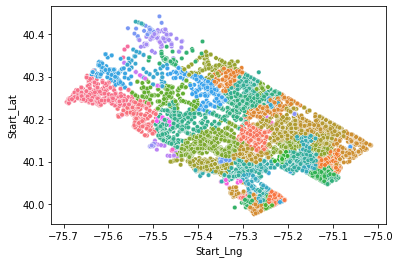

In [79]:
sns.scatterplot(x='Start_Lng',y='Start_Lat',data=df_county,hue='City', legend=False, s=20)

## Deal with categorical data: pd.get_dummies()

In [80]:
df_county_dummy = pd.get_dummies(df_county,drop_first=True)

# Export data
# df_county_dummy.to_csv('./US_Accidents_May19_{}_dummy.csv'.format(state),index=False)

df_county_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25206 entries, 228554 to 1724934
Columns: 137 entries, TMC to Weekday_Wed
dtypes: float64(11), uint8(126)
memory usage: 5.3 MB


In [81]:
df_county_dummy['City_Conshohocken'][0:2]

228554    0
228555    0
Name: City_Conshohocken, dtype: uint8

In [82]:
df_county_dummy.head(2)

,TMC,Severity,Start_Lng,Start_Lat,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Hour,...,Station_True,Stop_True,Traffic_Signal_True,Sunrise_Sunset_Night,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed
228554,201.0,2.0,-75.647789,40.301609,0.01,57.0,100.0,29.74,8.0,14.0,...,0,0,0,0,0,0,0,0,0,1
228555,201.0,2.0,-75.521545,40.198135,0.01,55.9,100.0,29.74,3.0,16.0,...,0,0,1,0,0,0,0,0,0,1


In [83]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [84]:
# Assign the data
df=df_county_dummy

# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
y = df[target]
X = df.drop(target, axis=1)



In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y) 

In [86]:
df['City_Conshohocken'][0:2]

228554    0
228555    0
Name: City_Conshohocken, dtype: uint8

In [87]:
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
# accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?

print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.973.


In [88]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp


Start_Lat                                   0.125722
Distance(mi)                                0.123425
Start_Lng                                   0.110525
TMC                                         0.078489
Time_Duration(min)                          0.054387
                                              ...   
No_Exit_True                                0.000000
Weather_Condition_Thunderstorms and Rain    0.000000
City_Upper Gwynedd                          0.000000
City_Palm                                   0.000000
Weather_Condition_Light Drizzle             0.000000
Length: 136, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


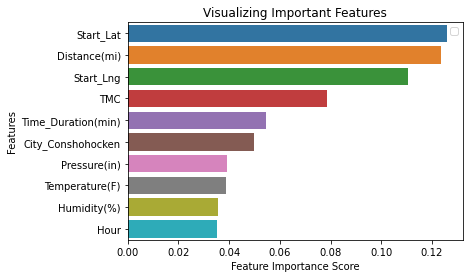

In [89]:
# Creating a bar plot, displaying only the top k features

k=10

sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [90]:
# List top k important features
k=20
feature_imp.sort_values(ascending=False)[:k]

Start_Lat                     0.125722
Distance(mi)                  0.123425
Start_Lng                     0.110525
TMC                           0.078489
Time_Duration(min)            0.054387
City_Conshohocken             0.049703
Pressure(in)                  0.039105
Temperature(F)                0.038703
Humidity(%)                   0.035769
Hour                          0.035307
Side_R                        0.023196
Traffic_Signal_True           0.022358
City_King of Prussia          0.016036
Junction_True                 0.015313
City_Bala Cynwyd              0.015288
Visibility(mi)                0.013489
City_Plymouth Meeting         0.012362
Weekday_Sun                   0.008674
City_Narberth                 0.007969
Weather_Condition_Overcast    0.007736
dtype: float64

In [91]:
#impotanc=clf.feature_importances_
#columns=X.columns
#i=0
#while i < len(columns):
   # print(f" the impotace of feature '{columns[i]}' is {round(impotanc[i]*100,2)}%.")
    #i+=1


# features that have an importance of more than 0.03

In [92]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03

sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features

for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

TMC
Start_Lng
Start_Lat
Distance(mi)
Temperature(F)
Humidity(%)
Pressure(in)
Hour
Time_Duration(min)
City_Conshohocken


In [93]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features


In [94]:
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [95]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm -- Full feature] accuracy_score: 0.973.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.973.


In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.98      0.99      0.99      4677
         3.0       0.90      0.71      0.80       363
         4.0       0.00      0.00      0.00         1

    accuracy                           0.97      5042
   macro avg       0.47      0.43      0.45      5042
weighted avg       0.97      0.97      0.97      5042



C:\Users\Asrar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asrar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asrar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[   0    1    0    0]
 [   0 4649   28    0]
 [   0  104  259    0]
 [   0    1    0    0]]


In [98]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm)



<AxesSubplot:>

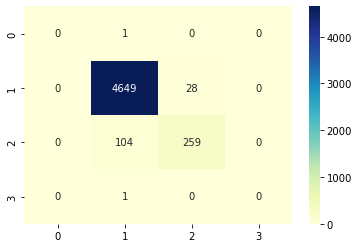

In [99]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [100]:
df_county.head(2)

,Source,TMC,Severity,Start_Lng,Start_Lat,Distance(mi),Side,City,Timezone,Temperature(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Hour,Weekday,Time_Duration(min)
228554,MapQuest,201.0,2.0,-75.647789,40.301609,0.01,L,Pottstown,US/Eastern,57.0,...,False,False,False,False,False,False,Day,14.0,Wed,130.0
228555,MapQuest,201.0,2.0,-75.521545,40.198135,0.01,R,Royersford,US/Eastern,55.9,...,False,False,False,False,True,False,Day,16.0,Wed,47.0


In [101]:
df_sel.columns

Index(['Source', 'TMC', 'Severity', 'Start_Lng', 'Start_Lat', 'Distance(mi)',
       'Side', 'City', 'County', 'State', 'Timezone', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Hour', 'Weekday', 'Time_Duration(min)'],
      dtype='object')

In [102]:
df['TMC'][0:2]


228554    201.0
228555    201.0
Name: TMC, dtype: float64

In [103]:
    #print(feat_labels[feature_list_index])

In [104]:
#df['City_Conshohocken'][0:2]

In [105]:
df['City_Conshohocken'][0:2]

228554    0
228555    0
Name: City_Conshohocken, dtype: uint8

In [106]:
new_test=[[201,75.647789,40.301609, 0.01, 57.0,100.0,29.74,14.0,130.0,0]]
y_important_pred = clf_important.predict(new_test)

# 5.0

In [107]:
y_important_pred         #### Severity :  228554    2.0

array([2.])

In [1]:
# For each state, find out how many unique days for each weekday/weekend



((15129, 18), (6484, 18), (15129,), (6484,))

C:\Users\Asrar\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2122.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:00:45   Log-Likelihood:            -2.0523e+05
No. Observations:               15129   AIC:                         4.105e+05
Df Residuals:                   15111   BIC:                         4.106e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.959e+06   3.28e+06      1.511

In [11]:
# import vif module
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [12]:
# vif_scores function as stated above

def vif_scores(data):
    vif = pd.DataFrame()
    vif['cols'] = data.columns
    vif['VIF'] = [VIF(data.values,i) for i in range(data.shape[1])]
    return vif.sort_values(by='VIF',ascending=False)

C:\Users\Asrar\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,cols,VIF
9,sqft_above,inf
2,sqft_living,inf
10,sqft_basement,inf
13,zipcode,1.630845e+06
15,long,1.359553e+06
14,lat,1.390263e+05
11,yr_built,9.588180e+03
8,grade,1.473809e+02
7,condition,3.471167e+01
1,bathrooms,2.861188e+01


LinearRegression()

array([ 386540.99847824, 1516969.01534063,  538662.72575246,
        584455.03778204])